#  LR Implementation on Apple Stock Data (AAPL) - Yuanxing

Reference (continue to be updated):
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
- https://github.com/SeanPLeary/time-series-h2o-automl-example/blob/master/h2o_automl_example_with_multivariate_time_series.ipynb

In [1]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# for normalizing data (why?)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv('../datasets/stocks/AAPL.csv')

# print the tail
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
9908,2020-04-01,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


Text(0, 0.5, 'Close Price')

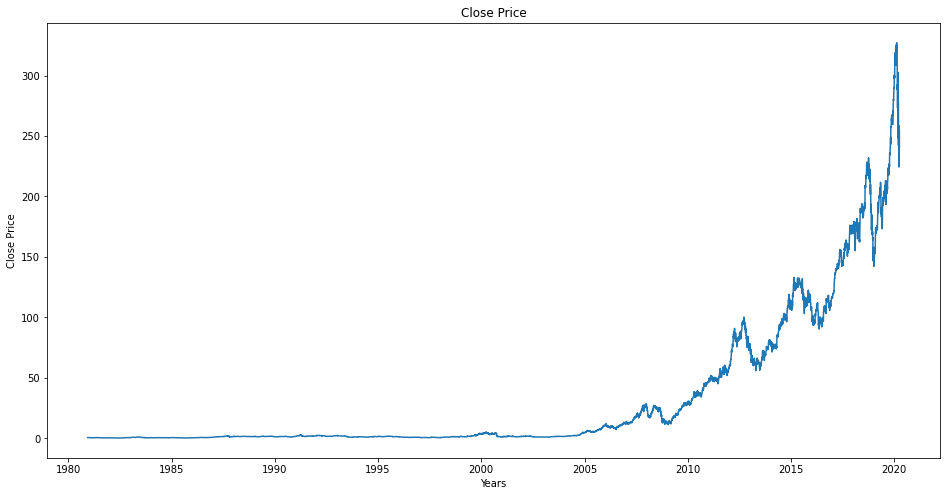

In [2]:
# setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title("Close Price")
plt.xlabel("Years")
plt.ylabel("Close Price")

From the above graph, data before 2010 (or 2015) doesn't seem to be very representive.

In [3]:
# discard data before year 2015
df = df[df['Date'] >= '2015-01-01']
df.drop('Date', axis=1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.216454,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.393181,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.402374,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.768150,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,102.563072,59364500
...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


## Daily with 1 step and 5 steps, with or without Volume

In [4]:
df_processed = df.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed

,Close,Volume,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5
Date,,,,,,,,,,,,
2015-01-02,109.330002,53204600,106.250000,106.260002,107.750000,111.889999,112.010002,64285500.0,65797100.0,40105900.0,59364500.0,53699500.0
2015-01-05,106.250000,64285500,106.260002,107.750000,111.889999,112.010002,109.250000,65797100.0,40105900.0,59364500.0,53699500.0,49650800.0
2015-01-06,106.260002,65797100,107.750000,111.889999,112.010002,109.250000,110.220001,40105900.0,59364500.0,53699500.0,49650800.0,67091900.0
2015-01-07,107.750000,40105900,111.889999,112.010002,109.250000,110.220001,109.800003,59364500.0,53699500.0,49650800.0,67091900.0,48956600.0
2015-01-08,111.889999,59364500,112.010002,109.250000,110.220001,109.800003,106.820000,53699500.0,49650800.0,67091900.0,48956600.0,60014000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19,244.779999,67964300,229.240005,224.369995,246.880005,245.520004,258.440002,100423300.0,84188200.0,71882800.0,75900500.0,63021800.0
2020-03-20,229.240005,100423300,224.369995,246.880005,245.520004,258.440002,247.740005,84188200.0,71882800.0,75900500.0,63021800.0,51054200.0
2020-03-23,224.369995,84188200,246.880005,245.520004,258.440002,247.740005,254.809998,71882800.0,75900500.0,63021800.0,51054200.0,41994100.0


In [5]:
df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

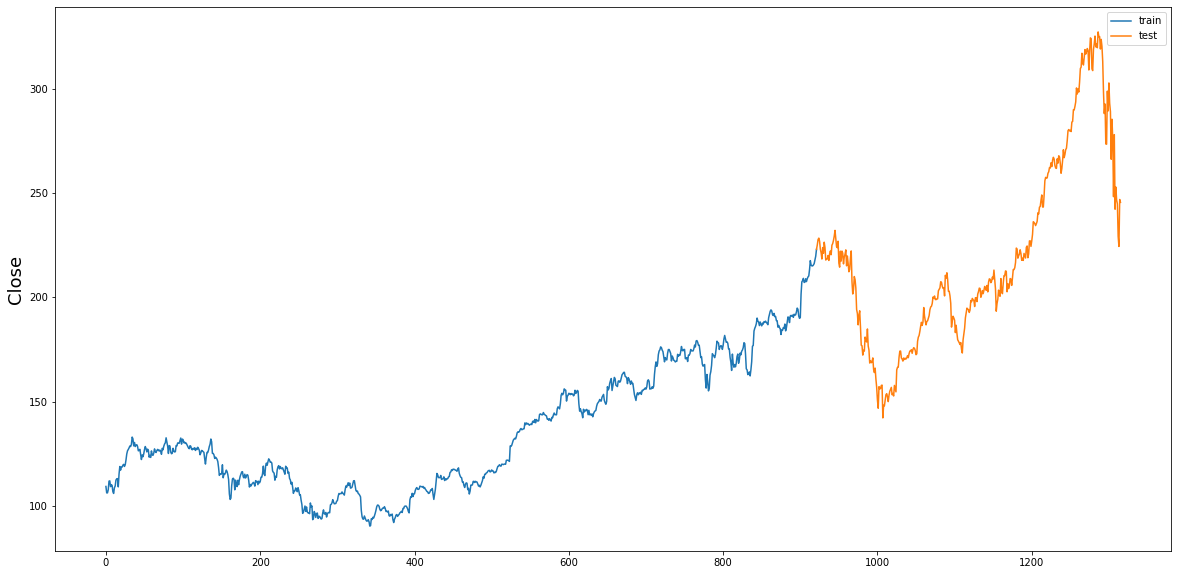

In [6]:
plt.plot(df_train.index,df_train['Close'])
plt.plot(df_test.index,df_test['Close'])
plt.ylabel('Close',fontsize=18)
plt.legend(['train','test'])
plt.show()

### Data Splitting

In [7]:
# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

In [8]:
# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  5.552446886096365
rms_lag1_with_vol:  5.530105127741231
rms_lag5:  5.681698540907912
rms_lag5_with_vol:  5.61165812798472


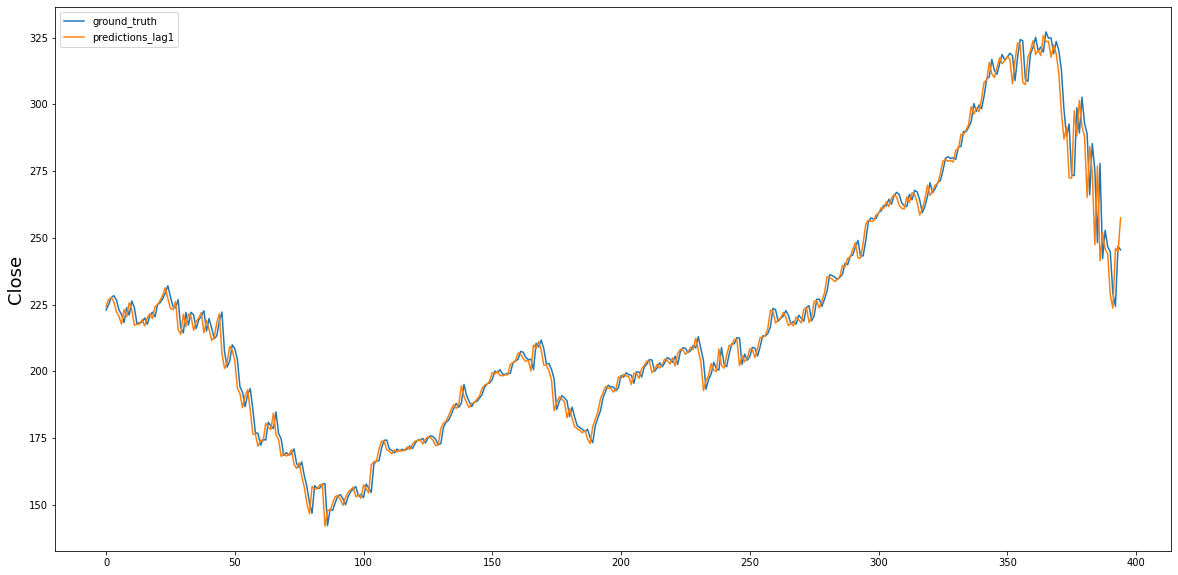

In [9]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

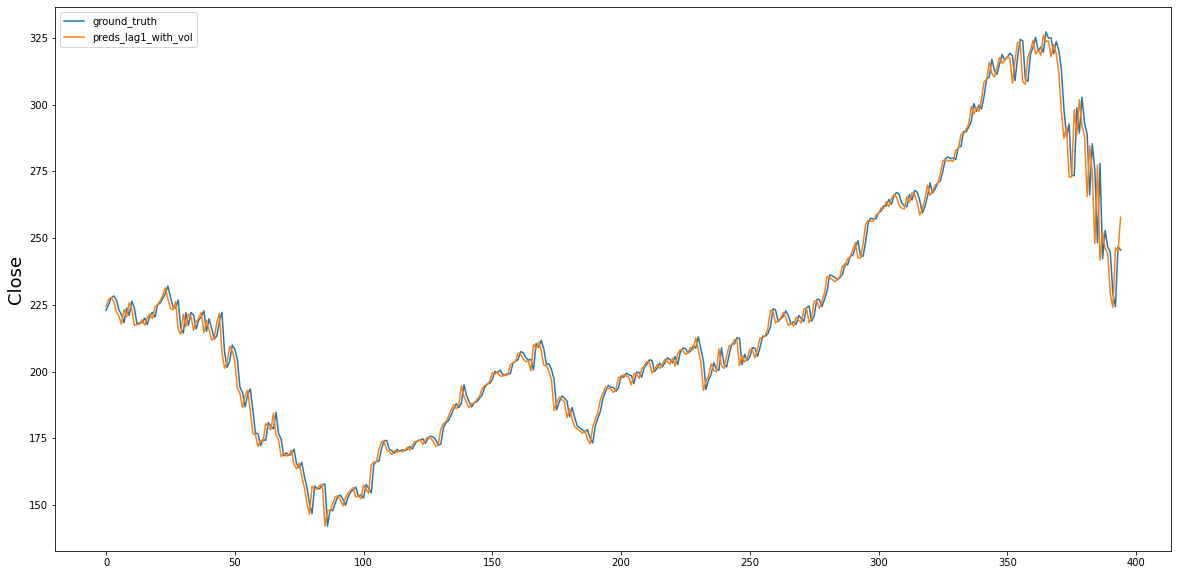

In [10]:
# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

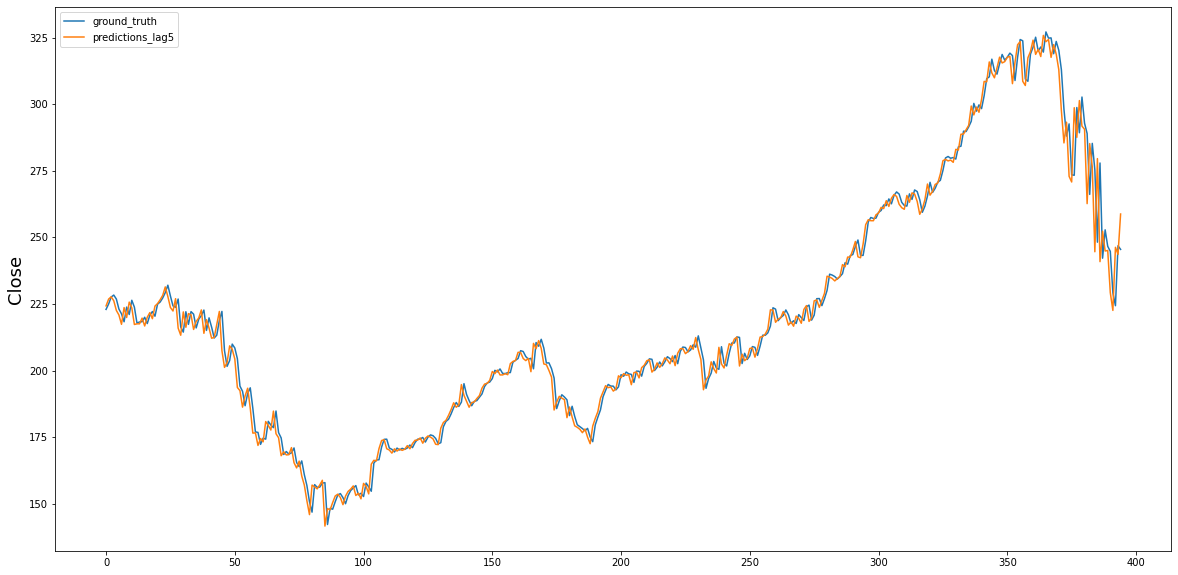

In [11]:
# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

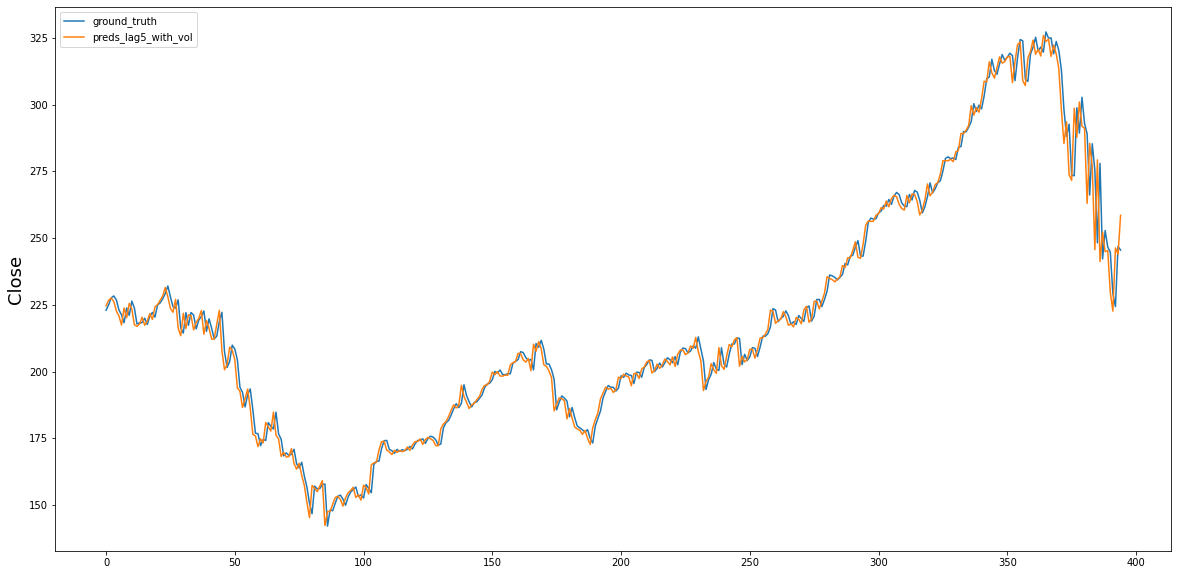

In [12]:
# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()

## Weekly

In [13]:
df_weekly = df.resample('W').mean()
df_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-04,111.389999,111.440002,107.349998,109.330002,100.216454,5.320460e+07
2015-01-11,108.786000,109.936000,107.129999,108.832001,99.759966,5.665050e+07
2015-01-18,110.020000,110.712000,107.614001,108.416000,99.378642,6.084532e+07
2015-01-25,109.837500,111.562500,109.004999,110.912502,101.667042,4.968425e+07
2015-02-01,115.701999,116.830002,113.909999,114.722000,105.158987,9.316854e+07
...,...,...,...,...,...,...
2020-03-08,291.982001,299.841998,285.858002,294.564001,294.564001,6.469004e+07
2020-03-15,267.822009,279.134003,261.035995,270.628000,270.628000,8.084198e+07
2020-03-22,244.759998,254.271994,237.225998,243.152002,243.152002,8.101318e+07


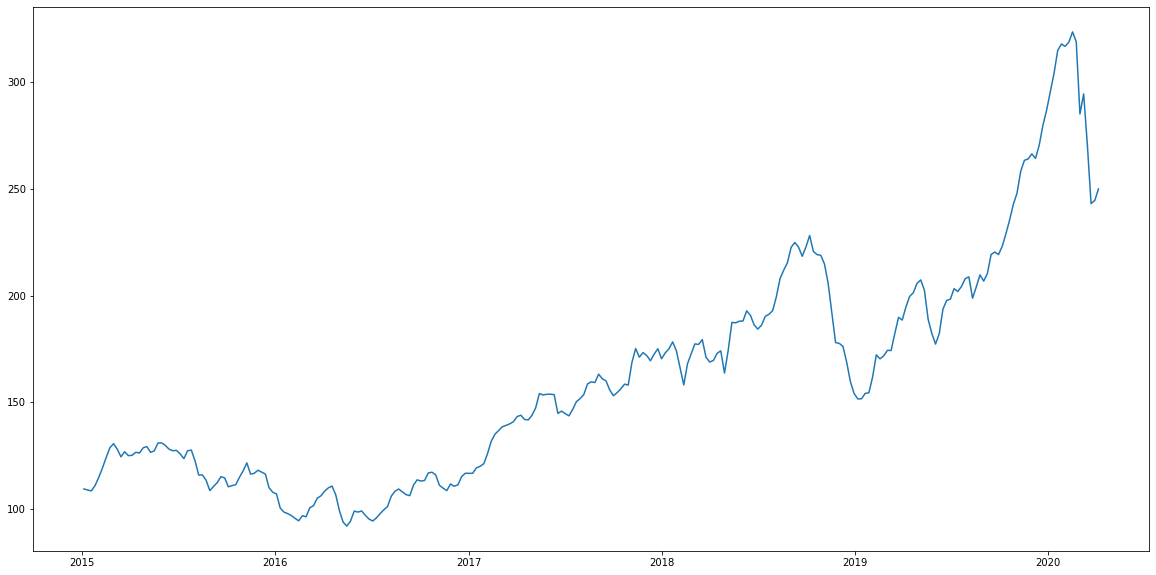

In [14]:
plt.plot(df_weekly['Close'], label='Close Price Weekly')

In [15]:
df_processed = df_weekly.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  7.046275608003442
rms_lag1_with_vol:  6.862187692512216
rms_lag5:  6.949757610319674
rms_lag5_with_vol:  6.759254002677703


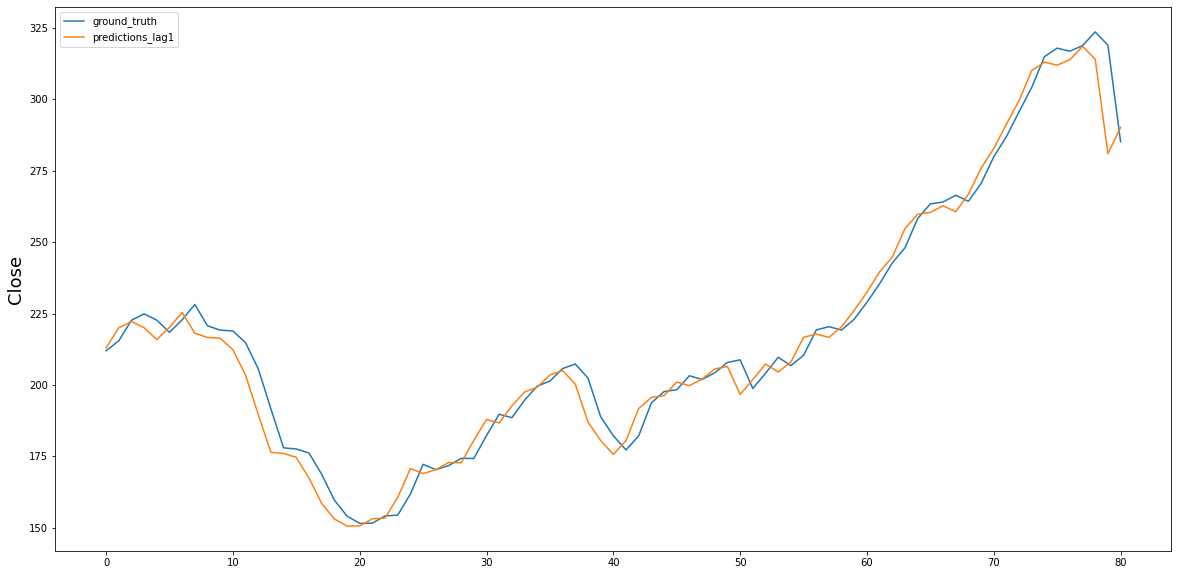

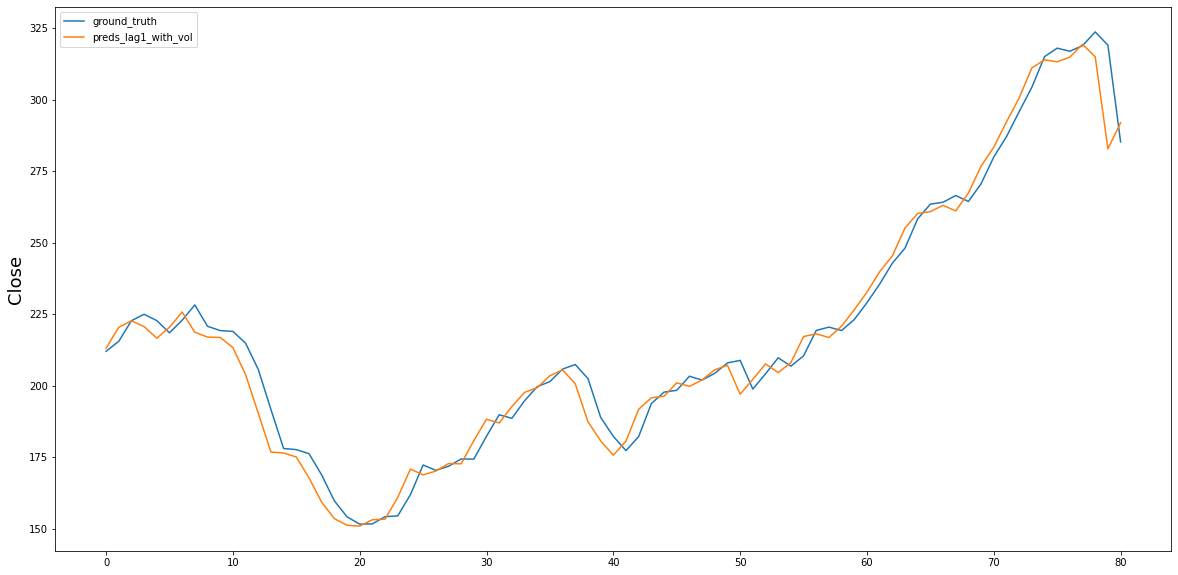

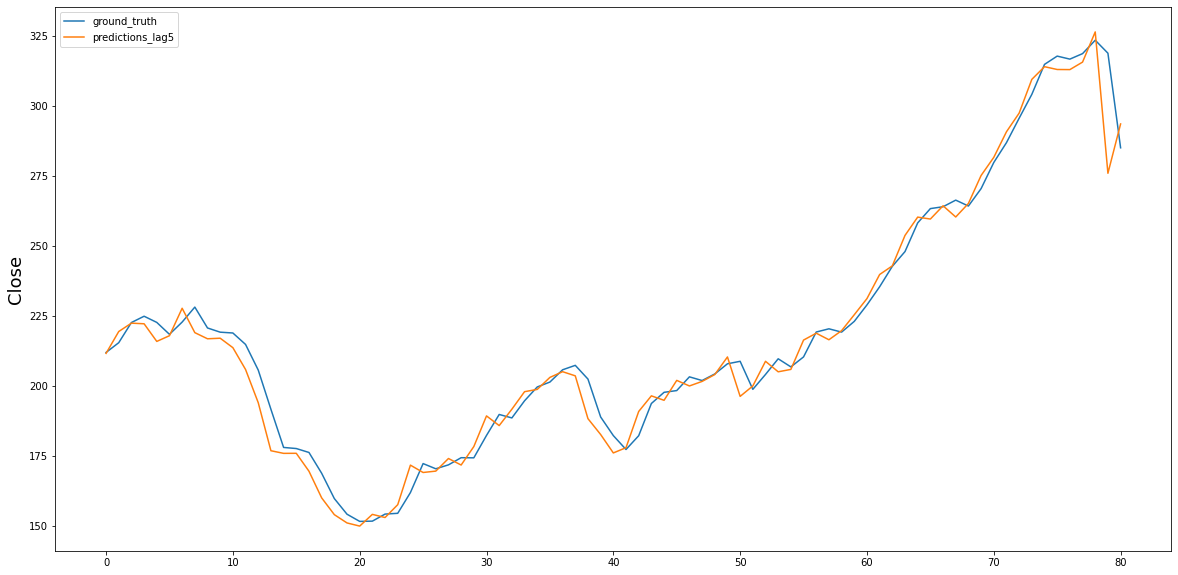

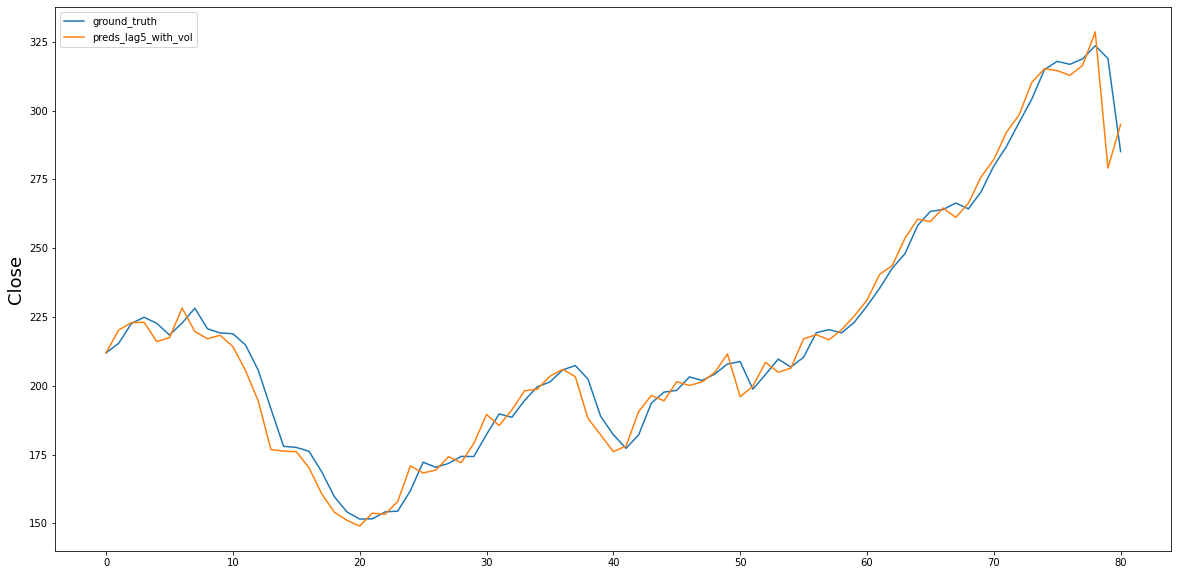

In [16]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()

## Monthly

In [17]:
df_monthly = df.resample('M').mean()
df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,111.164000,112.254000,109.332000,110.641501,101.418630,6.526317e+07
2015-02-28,125.023683,126.144738,124.031053,125.432105,115.362144,5.981764e+07
2015-03-31,126.466364,127.436363,124.985910,125.970908,115.925924,5.175646e+07
2015-04-30,127.535239,128.422380,126.224763,127.291428,117.141145,4.743502e+07
2015-05-31,128.707501,129.771001,127.663000,128.761500,118.891228,4.770760e+07
...,...,...,...,...,...,...
2019-12-31,275.391429,277.883809,273.868096,276.525710,275.870986,2.843803e+07
2020-01-31,311.170954,314.326188,308.831430,311.916191,311.177673,3.493298e+07
2020-02-29,310.313684,315.252633,306.726317,311.270522,311.111743,3.973488e+07


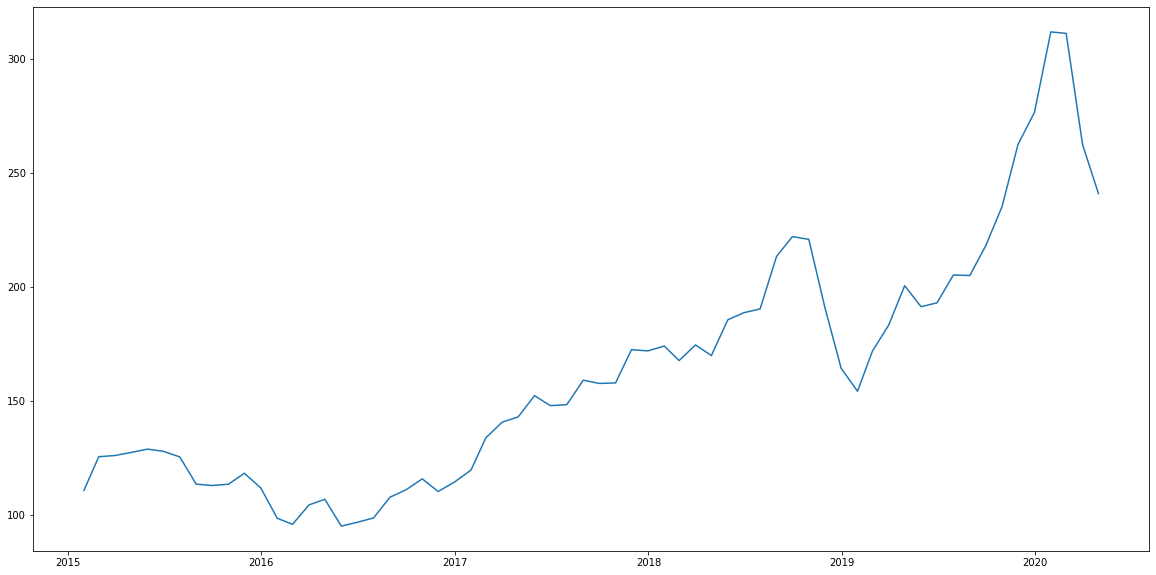

In [18]:
plt.plot(df_monthly['Close'], label='Close Price Monthly')

In [19]:
df_processed = df_monthly.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  14.460016785150026
rms_lag1_with_vol:  13.755362057961479
rms_lag5:  15.46254040704707
rms_lag5_with_vol:  16.439203325346742


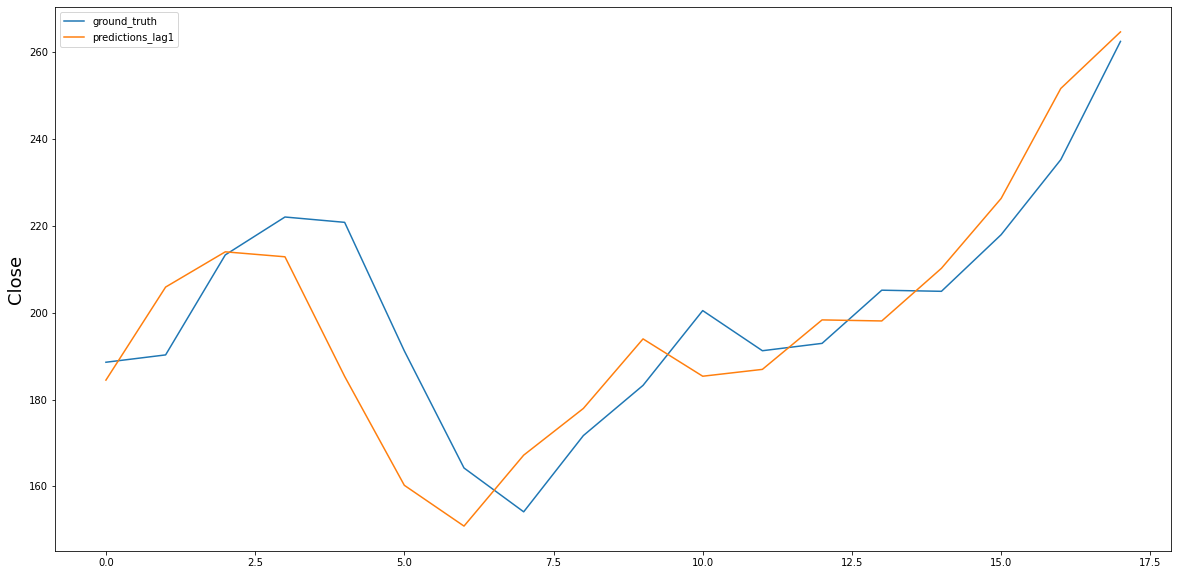

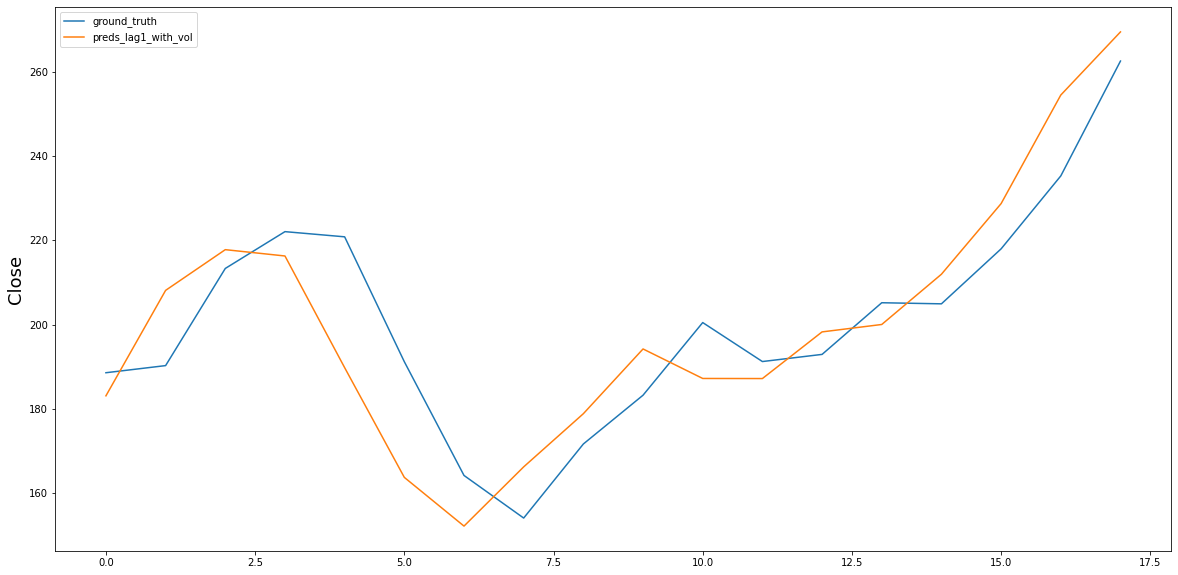

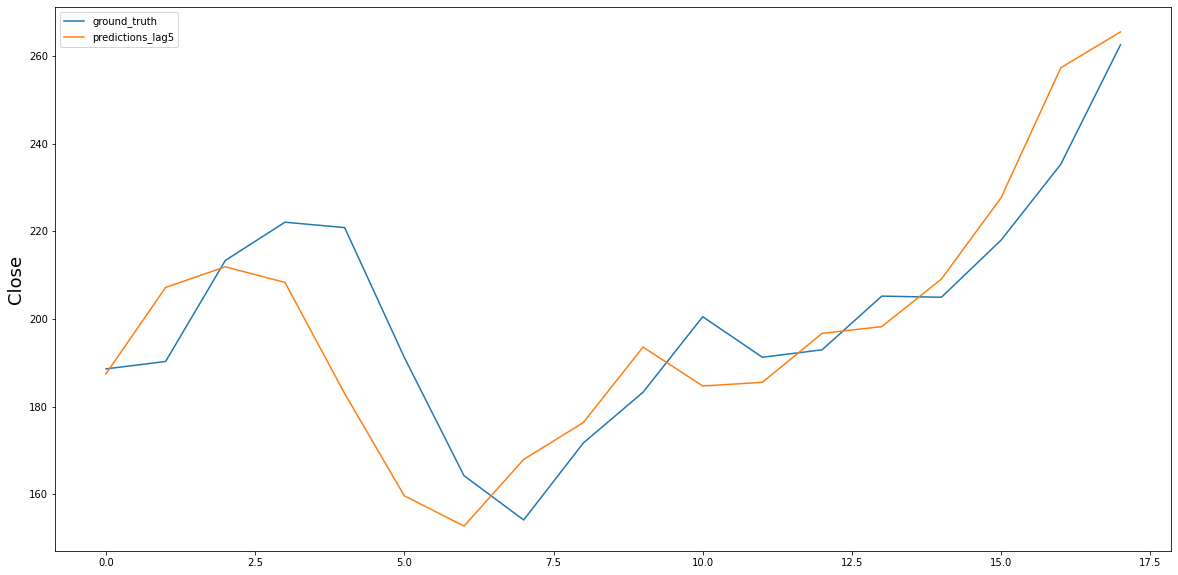

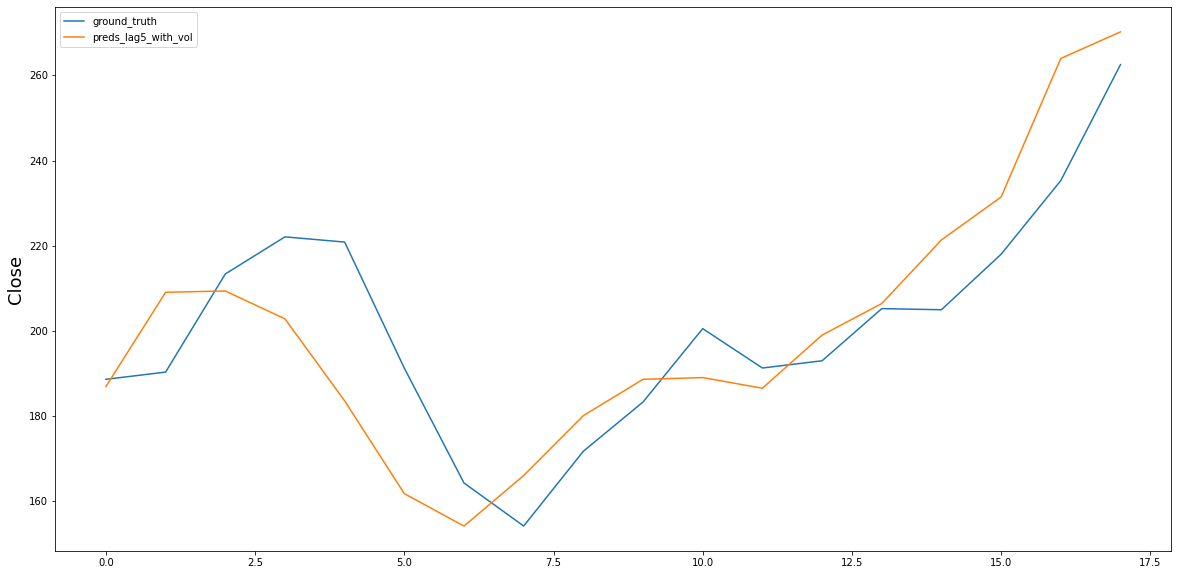

In [20]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()